In [602]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [521]:
data = pd.read_csv('Placement.csv')
data.head(4)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN


In [523]:
# Remove sl_no from the dataset
data.drop(['sl_no'],inplace=True,axis=1)

## * Replace the NaN values with correct value. And justify why you have
chosen the same.

In [526]:
data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

<Axes: ylabel='salary'>

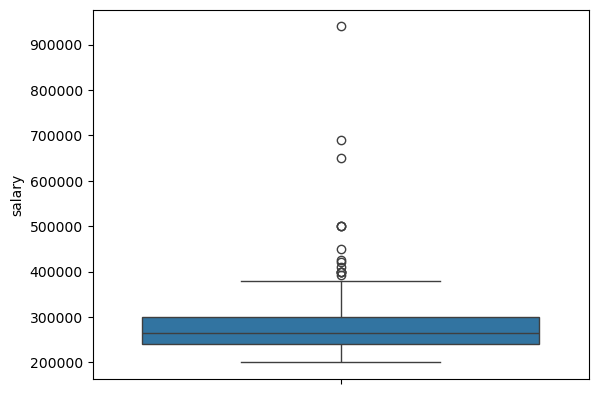

In [528]:
#Boxplot wil show outliers present in that data
sns.boxplot(data['salary'])

<Axes: xlabel='salary', ylabel='Count'>

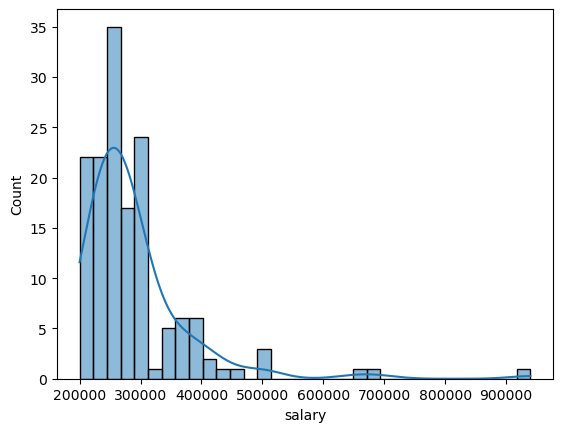

In [530]:
# histplot will give you how is our data is skewed
sns.histplot(data['salary'],kde=True)

## * Since it is skewed we cannot fill the missing values with mean so we can go with median

In [533]:
# Filling the missing values with Median value:
data.loc[data['salary'].isnull(),'salary'] = data['salary'].median()

In [535]:
data.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

## * How many of them are not placed?

In [538]:
data['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

* 67 ppl's are not getting placed

## * Find the reason for non placement from the dataset?

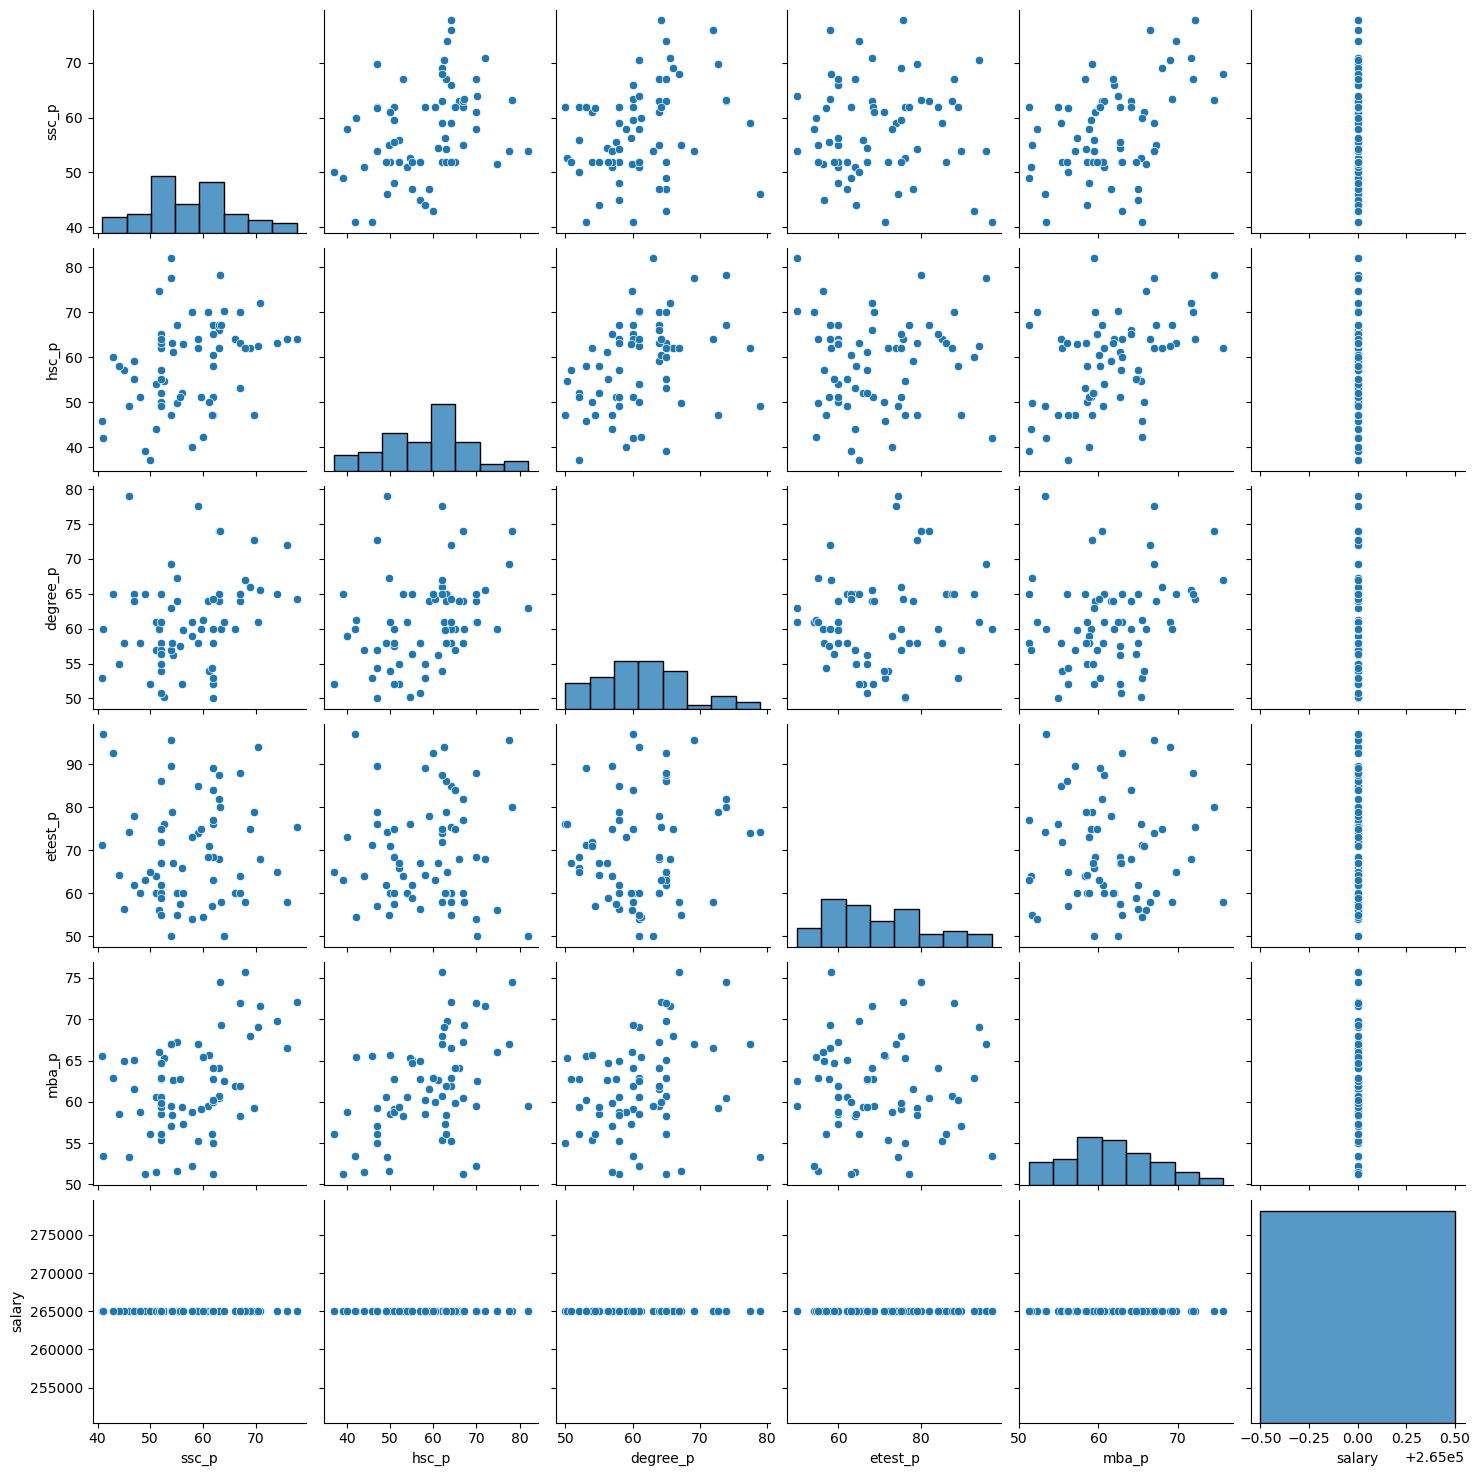

In [542]:
df = data.loc[data['status'] == 'Not Placed']
sns.pairplot(df)
plt.show()

In [543]:
data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [544]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,281283.720930
std,10.827205,10.897509,7.358743,13.275956,5.833385,78232.510303
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,250000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [548]:
data.groupby('status').mean(numeric_only=True)


,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
status,,,,,,
Not Placed,57.544030,58.395522,61.134179,69.587910,61.612836,265000.000000
Placed,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405


In [550]:
for col in ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']:
    print(f"\n--- {col} by Placement Status ---")
    print(pd.crosstab(data[col], data['status'], normalize='index') * 100)



--- gender by Placement Status ---
status  Not Placed     Placed
gender                       
F        36.842105  63.157895
M        28.057554  71.942446

--- ssc_b by Placement Status ---
status   Not Placed     Placed
ssc_b                         
Central   32.758621  67.241379
Others    29.292929  70.707071

--- hsc_b by Placement Status ---
status   Not Placed     Placed
hsc_b                         
Central   32.142857  67.857143
Others    30.534351  69.465649

--- hsc_s by Placement Status ---
status    Not Placed     Placed
hsc_s                          
Arts       45.454545  54.545455
Commerce   30.088496  69.911504
Science    30.769231  69.230769

--- degree_t by Placement Status ---
status     Not Placed     Placed
degree_t                        
Comm&Mgmt   29.655172  70.344828
Others      54.545455  45.454545
Sci&Tech    30.508475  69.491525

--- workex by Placement Status ---
status  Not Placed     Placed
workex                       
No       40.425532  59.574468
Ye

## * What kind of relation between salary and mba_p

In [553]:
data[['salary', 'mba_p']].corr()


,salary,mba_p
salary,1.000000,0.155673
mba_p,0.155673,1.000000


* a weak positive relationship.

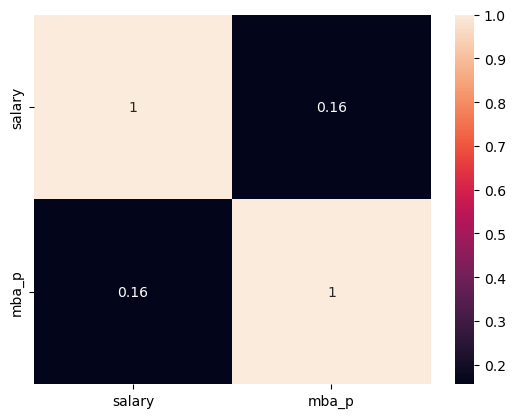

In [556]:
sns.heatmap(data[['salary', 'mba_p']].corr(),annot=True)
plt.show()

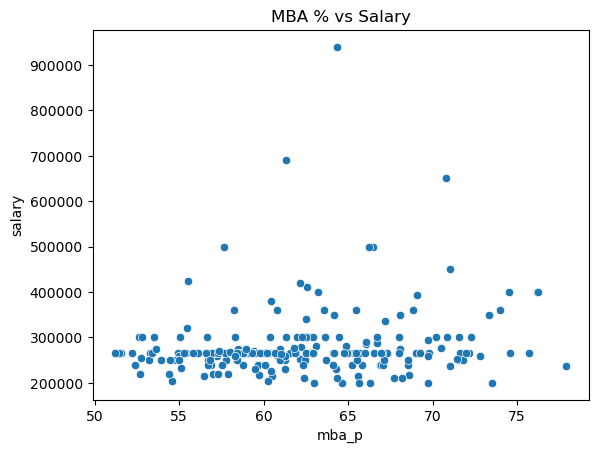

In [558]:

sns.scatterplot(x='mba_p', y='salary', data=data)
plt.title("MBA % vs Salary")
plt.show()


## * Which specialization is getting minimum salary?

In [561]:
data['specialisation'].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [563]:
fin = data.loc[data['specialisation']=='Mkt&Fin']
hr = data.loc[data['specialisation']=='Mkt&HR']

In [565]:
min_fin = fin['salary'].min()
max_fin = fin['salary'].max()
print(min_fin,max_fin)

200000.0 940000.0


In [567]:
min_hr = hr['salary'].min()
max_hr = hr['salary'].max()
print(min_hr,max_hr)

200000.0 450000.0


* Both min salary's are 20k no diff in that and max salary has difference

## * How many of them getting above 500000 salary?

In [571]:
data.loc[data['salary'] > 500000]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


In [573]:
data.loc[data['salary'] >= 500000].shape[0]

6

* only 3 members are getting above 5lac salary
* There are 6 members who are getting 5lac & plus salaries

## * Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [577]:
data[['etest_p','mba_p']].head()

,etest_p,mba_p
0,55.0,58.80
1,86.5,66.28
2,75.0,57.80
3,66.0,59.43
4,96.8,55.50


In [579]:
from scipy.stats import f_oneway

# Performing one-way ANOVA
f_stat, p_value = f_oneway(data['etest_p'], data['mba_p'])

# Printing results
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Decision at 5% significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between etest_p and mba_p.")
else:
    print("Fail to reject the null hypothesis: No significant difference between etest_p and mba_p.")

F-statistic: 98.6449
P-value: 0.0000
Reject the null hypothesis: There is a significant difference between etest_p and mba_p.


## * Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)

Here’s the process:

* Load data

* Filter two groups:

* degree_t == 'Sci&Tech'

* specialisation == 'Mkt&HR'

* Extract the salary column from both

* Perform independent t-test

* Make a decision based on the p-value and alpha = 0.05

In [582]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [584]:
from scipy.stats import ttest_ind

In [586]:
# Filter salaries for the two groups
sci_tech_salaries = data[data['degree_t'] == 'Sci&Tech']['salary']
mkt_hr_salaries = data[data['specialisation'] == 'Mkt&HR']['salary']

In [588]:
# Perform two-sample independent t-test
t_stat, p_value = ttest_ind(sci_tech_salaries, mkt_hr_salaries)

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Make a decision at 5% significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in salaries.")
else:
    print("Fail to reject the null hypothesis: No significant difference in salaries.")

T-statistic: 3.0530
P-value: 0.0027
Reject the null hypothesis: Significant difference in salaries.


## * Convert the normal distribution to standard normal distribution for salary column

<Axes: xlabel='salary', ylabel='Count'>

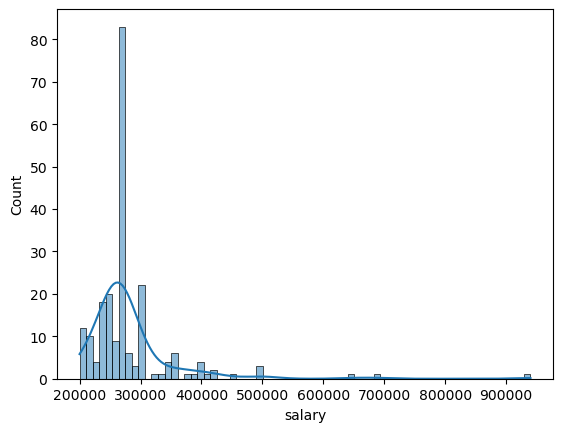

In [591]:
# Before Normal Distribution:
sns.histplot(data['salary'],kde=True)

In [593]:
 def stdNBgraph(data):
        # Coverted to standard Normal Distribution
        import seaborn as sns
         # Step 1: Calculate mean and std
        mean=data.mean()
        std=data.std()
    
        values=[i for i in data]
        # Step 2: Convert to Z-scores
        z_score=[((j-mean)/std) for j in values]
    
        # Step 3: Plot distribution
        sns.distplot(z_score,kde=True)
    
        sum(z_score)/len(z_score)
        #z_score.std()

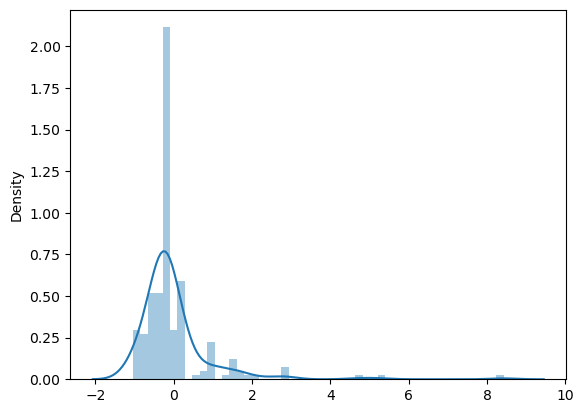

In [595]:
#After normal distribution:
stdNBgraph(data['salary'])

## * What is the probability Density Function of the salary range from 700000 to 900000?

<Axes: xlabel='salary', ylabel='Count'>

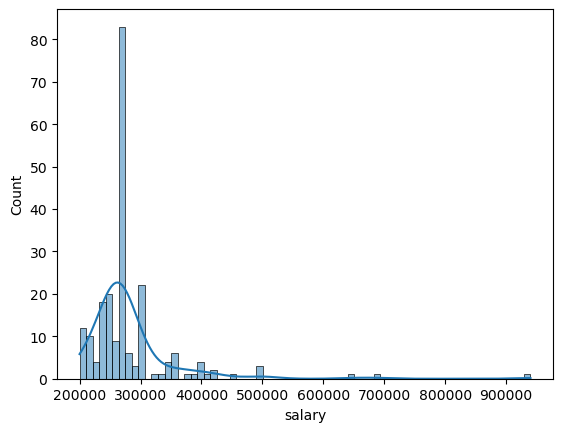

In [612]:
# Normal Distribution:
sns.histplot(data['salary'],kde=True)

In [614]:
def get_pdf_probability(data,startrange,endrange):
        from matplotlib import pyplot
        from scipy.stats import norm
        import seaborn as sns
        ax = sns.distplot(data,kde=True,kde_kws={'color':'blue'},color='Green')
        pyplot.axvline(startrange,color='Red')
        pyplot.axvline(endrange,color='Red')
        # generate a sample
        sample = data
        # calculate parameters
        sample_mean =sample.mean()
        sample_std = sample.std()
        print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
        # define the distribution
        dist = norm(sample_mean, sample_std)
        
        # sample probabilities for a range of outcomes
        values = [value for value in range(startrange, endrange)]
        probabilities = [dist.pdf(value) for value in values]    
        prob=sum(probabilities)
        print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
        return prob

Mean=281283.721, Standard Deviation=78232.510
The area between range(700000,900000):4.344644650776384e-08


4.344644650776384e-08

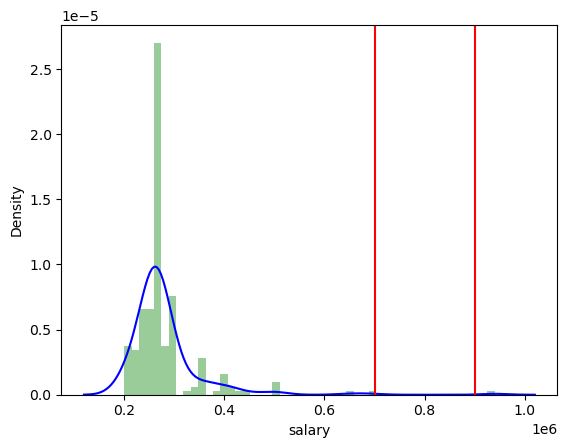

In [616]:
get_pdf_probability(data['salary'],700000,900000)

**The probability that a randomly selected individual has a salary between ₹700,000 and ₹900,000 is extremely low — approximately 0.000000043**

## * Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [619]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [629]:
# Dependent Sample Paired T_Test
etest = data[data['degree_t']=='Sci&Tech']['etest_p']
mba = data[data['degree_t']=='Sci&Tech']['mba_p']

t_stat, p_value = ttest_ind(etest,mba)
print(t_stat, p_value)
if p_value < 0.05:
    print("Result: Reject H₀ — There is a Significant difference between Sci&Tech.")
else:
    print("Result: Fail to reject H₀ — No significant difference.")

4.532000225151251 1.4289217003775636e-05
Result: Reject H₀ — There is a Significant difference between Sci&Tech.


## * Which parameter is highly correlated with salary?

In [455]:
corr_matrix = numeric_data.corr()
corr_matrix

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.108669
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.122921
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.053352
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.169233
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.155673
salary,0.108669,0.122921,0.053352,0.169233,0.155673,1.000000


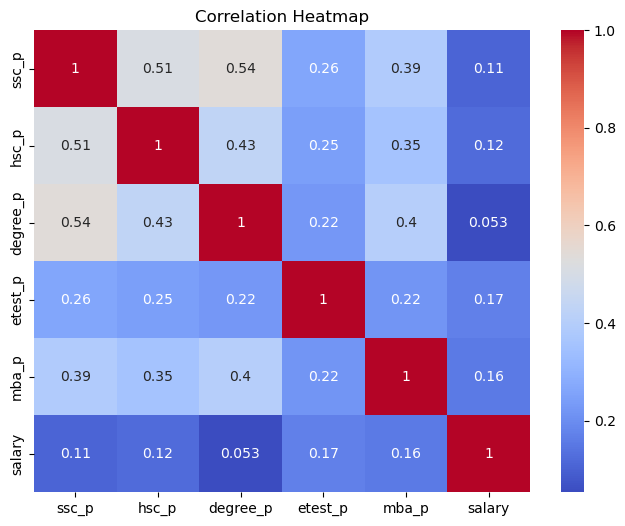

In [452]:
numeric_data = data.select_dtypes(include=['number'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**The variable etest_p has the highest positive correlation with salary, at 0.1692.**
* This is a weak positive correlation (close to 0).

## * plot any useful graph and explain it.
* Sample analysis with categorical and nemerical features:

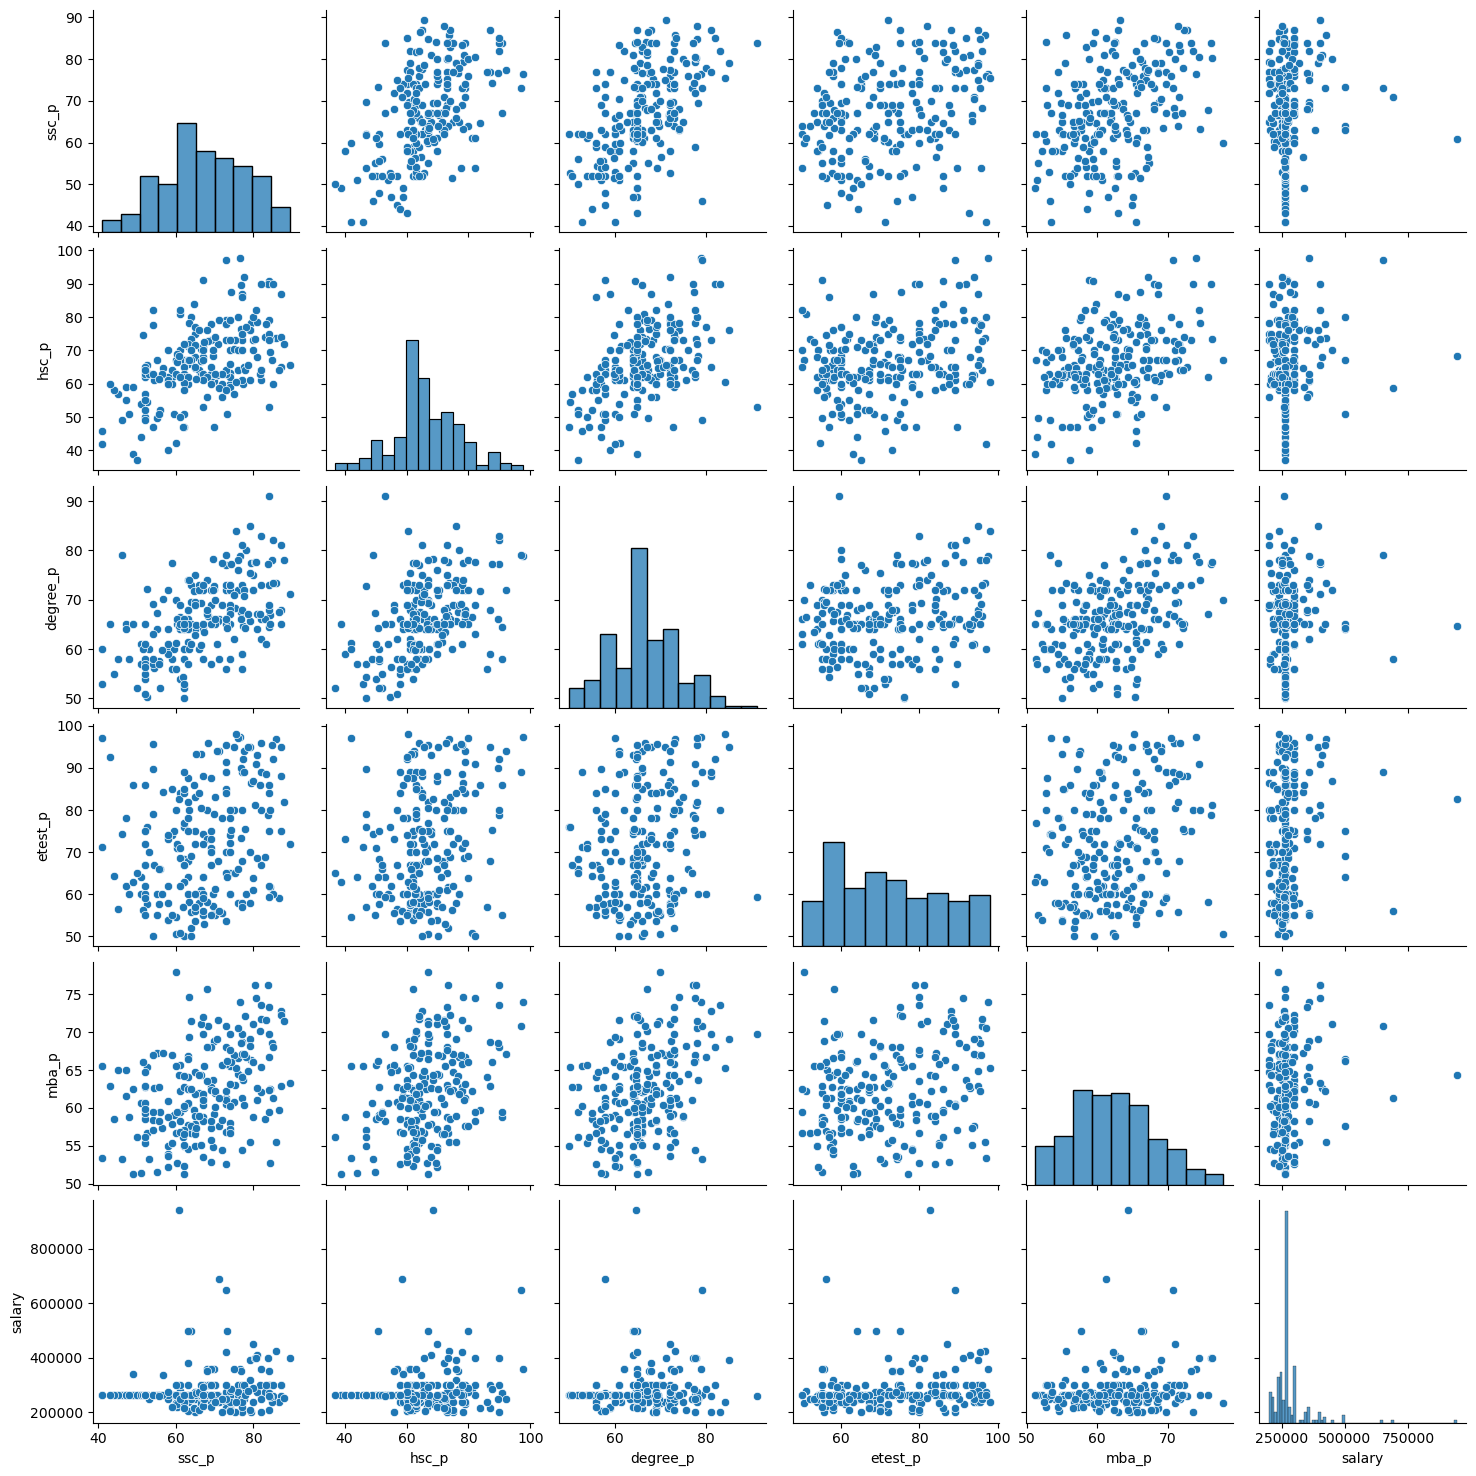

In [444]:
# Using pairplot to look corelation btw all numerical value:
sns.pairplot(data)

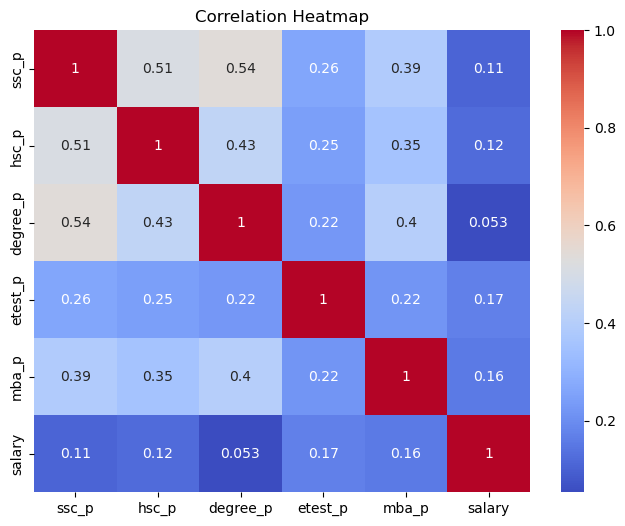

In [442]:
numeric_data = data.select_dtypes(include=['number'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


<Axes: xlabel='specialisation', ylabel='count'>

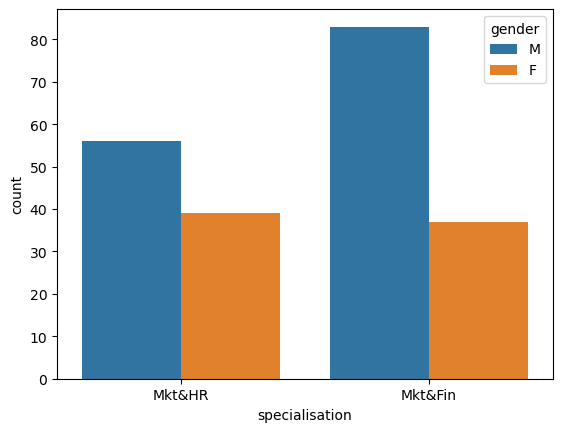

In [652]:
# analysis of specialisation with gender
sns.countplot(x='specialisation', data=data,hue='gender')

<Axes: xlabel='degree_t', ylabel='salary'>

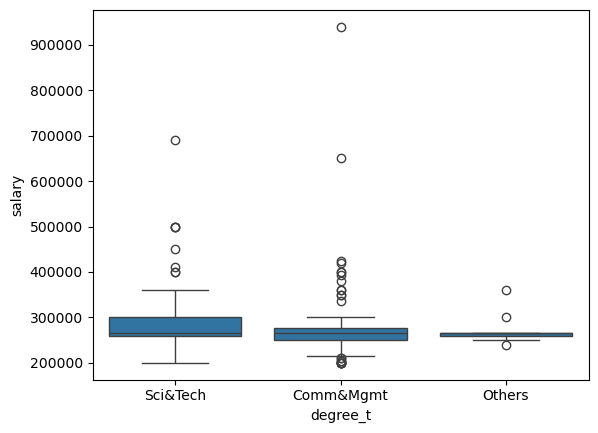

In [645]:
#Compare Salary Distribution Across Degree Types (Box Plot)
sns.boxplot(x='degree_t', y='salary', data=data)